<a href="https://colab.research.google.com/github/tsekine2/Keras-Tutorial/blob/master/Keras_VGG16_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
'''インポート'''
import numpy as np
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [5]:
'''データセットの読み込み'''
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
'''バッチサイズ、クラス数、エポック数の設定'''
batch_size=64
num_classes=10
epochs=20
'''one-hotベクトル化'''
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
'''shape表示'''
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

170500096/170498071 [==============================] - 2s 0us/step
x_train :  (50000, 32, 32, 3)
y_train :  (50000, 10)
x_test :  (10000, 32, 32, 3)
y_test :  (10000, 10)


In [6]:
'''VGG16'''
input_shape=x_train.shape[1:]
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=input_shape, name='block1_conv1'))
model.add(BatchNormalization(name='bn1'))
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', name='block1_conv2'))
model.add(BatchNormalization(name='bn2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same', name='block1_pool'))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', name='block2_conv1'))
model.add(BatchNormalization(name='bn3'))
model.add(Activation('relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', name='block2_conv2'))
model.add(BatchNormalization(name='bn4'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same', name='block2_pool'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', name='block3_conv1'))
model.add(BatchNormalization(name='bn5'))
model.add(Activation('relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', name='block3_conv2'))
model.add(BatchNormalization(name='bn6'))
model.add(Activation('relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', name='block3_conv3'))
model.add(BatchNormalization(name='bn7'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same', name='block3_pool'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='block4_conv1'))
model.add(BatchNormalization(name='bn8'))
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='block4_conv2'))
model.add(BatchNormalization(name='bn9'))
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='block4_conv3'))
model.add(BatchNormalization(name='bn10'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same', name='block4_pool'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='block5_conv1'))
model.add(BatchNormalization(name='bn11'))
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='block5_conv2'))
model.add(BatchNormalization(name='bn12'))
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='block5_conv3'))
model.add(BatchNormalization(name='bn13'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same', name='block5_pool'))
model.add(Flatten(name='flatten'))
model.add(Dense(units=4096, activation='relu', name='fc1'))
model.add(Dense(units=4096, activation='relu', name='fc2'))
model.add(Dense(units=num_classes, activation='softmax', name='predictions'))
model.summary()













Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
bn2 (BatchNormalization)     (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16

In [7]:
'''optimizer定義'''
optimizer=keras.optimizers.adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
'''データ正規化'''
x_train=x_train.astype('float32')
x_train/=255
x_test=x_test.astype('float32')
x_test/=255
'''fit'''
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 42s 849us/step - loss: 2.1699 - acc: 0.1591 - val_loss: 2.7100 - val_acc: 0.1319
Epoch 2/20
50000/50000 [==============================] - 33s 662us/step - loss: 1.6754 - acc: 0.3359 - val_loss: 1.9222 - val_acc: 0.3466
Epoch 3/20
50000/50000 [==============================] - 33s 666us/step - loss: 1.2925 - acc: 0.5181 - val_loss: 1.6019 - val_acc: 0.4707
Epoch 4/20
50000/50000 [==============================] - 33s 669us/step - loss: 1.0070 - acc: 0.6419 - val_loss: 1.5776 - val_acc: 0.5295
Epoch 5/20
50000/50000 [==============================] - 33s 661us/step - loss: 0.8200 - acc: 0.7197 - val_loss: 1.0380 - val_acc: 0.6598
Epoch 6/20
50000/50000 [==============================] - 33s 667us/step - loss: 0.6815 - acc: 0.7725 - val_loss: 1.1489 - val_acc: 0.6556
Epoch 7/20
50000/5

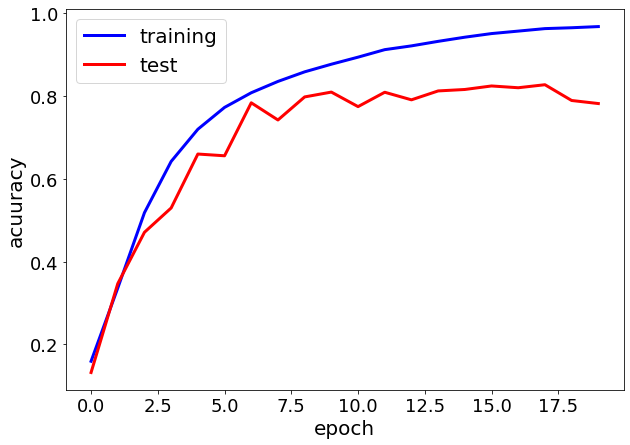

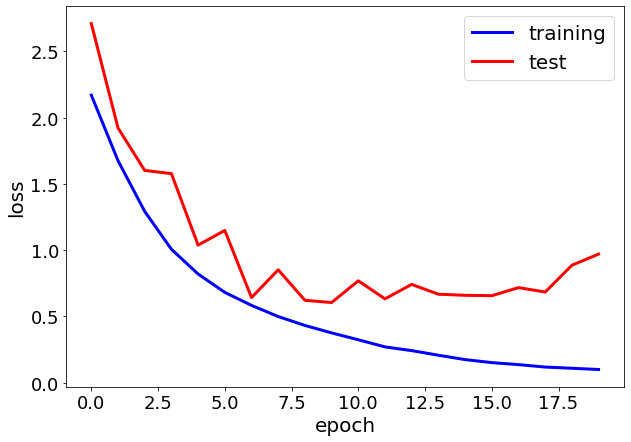

In [16]:
'''結果の可視化'''
plt.figure(figsize=(10,7))
plt.plot(history.history['acc'], color='b', linewidth=3)
plt.plot(history.history['val_acc'], color='r', linewidth=3)
plt.tick_params(labelsize=18)
plt.ylabel('acuuracy', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(['training', 'test'], loc='best', fontsize=20)
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], color='b', linewidth=3)
plt.plot(history.history['val_loss'], color='r', linewidth=3)
plt.tick_params(labelsize=18)
plt.ylabel('loss', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(['training', 'test'], loc='best', fontsize=20)
plt.show()

In [0]:
'''データ保存'''
model.save('cifar10-CNN.h5')
model.save_weights('cifar10-CNN-weights.h5')